Configuration

%%html
<style>
div.input {
    display:none;
}
</style>

# TDMA in 1D
## TDMA with noncyclic b.c.
The test equation is
The theoretical solutioni is
The calculated solution is

## TDMA with cyclic b.c.
The test equation is
The theoretical solutioni is
The calculated solution is

# Fullystaggered mesh

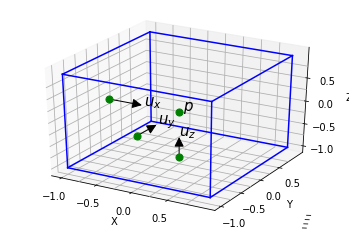

In [105]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_aspect("equal")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

major_ticks = np.arange(-1, 1, 0.5)
minor_ticks = np.arange(-1, 1, 0.25)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_zticks(major_ticks)
ax.set_zticks(minor_ticks, minor=True)


# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

# draw a point
ax.scatter([0], [0], [0], color="g", s=50)
ax.text(0, 0.1, 0, '$p$', fontsize=15)

# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

ax.scatter([-1], [0], [0], color="g", s=50)
a = Arrow3D([-1, -0.5], [0, 0], [0, 0], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.text(-0.5, 0, 0, '$u_x$', fontsize=15)
ax.add_artist(a)

ax.scatter([0], [-1], [0], color="g", s=50)
a = Arrow3D([0, 0], [-1, -0.5], [0, 0], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.text(0, -0.5, 0, '$u_y$', fontsize=15)
ax.add_artist(a)

ax.scatter([0], [0], [-1], color="g", s=50)
a = Arrow3D([0, 0], [0, 0], [-1, -0.5], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.text(0, 0, -0.5, '$u_z$', fontsize=15)
ax.add_artist(a)

plt.show()

# Interpolation
The input velocity is
$u(x,y,z)=sin(x) + sin(y) + sin(z)$. $x \in \{ 0, 2\pi \}$, $y \in \{ -\pi ,\pi \}$.

The interpolation involve two types of interpolation,
* interpolation of u in x direction, from face $(i', j, k)$ to cell centre $(i, j, k)$, called P2C
* interpolation of u in y direction, from face $(i', j, k)$ to edge $(i', j', k)$, called C2P

## Uniform mesh with Periodic B.C.

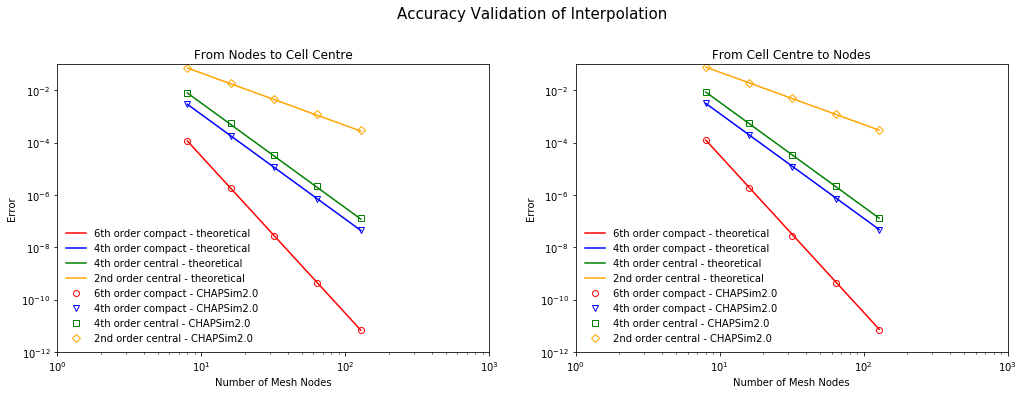

In [106]:
from matplotlib import pyplot as plt
import numpy as np
import pylab as pl
import mpl_toolkits.axisartist as AA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.axes_grid1 import host_subplot
import math
import itertools

%matplotlib inline

plt.rc('figure', facecolor="white")
plt.rc('legend', fontsize=10)
rcParams['legend.loc'] = 'best'
cbrg = cm.get_cmap(name='brg', lut=None) ## 1=green 0=blue  0.5=red

nsz = np.array([8, 16, 32, 64, 128])

err6cp_p2c = np.array([1.1444298E-04, 1.7905790E-06, 2.7979968E-08, 4.3719028E-10, 6.8323125E-12])
err6cp_c2p = np.array([1.2387219E-04, 1.8256585E-06, 2.8115351E-08, 4.3771764E-10, 6.8349770E-12])

err4cp_p2c = np.array([2.8881061E-03, 1.8456799E-04, 1.1593294E-05, 7.2546235E-07, 4.5355088E-08])
err4cp_c2p = np.array([3.1260635E-03, 1.8818389E-04, 1.1649389E-05, 7.2633726E-07, 4.5368752E-08])

err4cd_p2c = np.array([7.8261419E-03, 5.3968797E-04, 3.4557253E-05, 2.1728943E-06, 1.3601063E-07])
err4cd_c2p = np.array([8.4709550E-03, 5.5026108E-04, 3.4724460E-05, 2.1755148E-06, 1.3605161E-07])

err2cd_p2c = np.array([7.0326142E-02, 1.8845514E-02, 4.7920865E-03, 1.2030929E-03, 3.0109059E-04])
err2cd_c2p = np.array([7.6120467E-02, 1.9214720E-02, 4.8152733E-03, 1.2045438E-03, 3.0118130E-04])

err6cp_p2c_ref = err6cp_p2c[0] * np.array([1, 2**(-6), 4**(-6), 8**(-6), 16**(-6)])
err4cp_p2c_ref = err4cp_p2c[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err4cd_p2c_ref = err4cd_p2c[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err2cd_p2c_ref = err2cd_p2c[0] * np.array([1, 2**(-2), 4**(-2), 8**(-2), 16**(-2)])

err6cp_c2p_ref = err6cp_c2p[0] * np.array([1, 2**(-6), 4**(-6), 8**(-6), 16**(-6)])
err4cp_c2p_ref = err4cp_c2p[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err4cd_c2p_ref = err4cd_c2p[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err2cd_c2p_ref = err2cd_c2p[0] * np.array([1, 2**(-2), 4**(-2), 8**(-2), 16**(-2)])

lblref = ['6th order compact - theoretical', \
          '4th order compact - theoretical', \
          '4th order central - theoretical', \
          '2nd order central - theoretical']

lblcal = ['6th order compact - CHAPSim2.0', \
          '4th order compact - CHAPSim2.0', \
          '4th order central - CHAPSim2.0', \
          '2nd order central - CHAPSim2.0']


fig, axs=plt.subplots(2, 1)
fig.suptitle('Accuracy Validation of Interpolation', x=1.1, y=1.2, fontsize = 15)

# P2C
axs[0]=fig.add_axes([0,0,1,1])
axs[0].set_title("From Nodes to Cell Centre", fontsize = 12)
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel("Number of Mesh Nodes")
axs[0].set_ylabel("Error")
axs[0].set_xlim([1,1000])
axs[0].set_ylim([1e-12,1e-1])

axs[0].plot(nsz, err6cp_p2c_ref, label=lblref[0], color="red")
axs[0].plot(nsz, err4cp_p2c_ref, label=lblref[1], color="blue")
axs[0].plot(nsz, err4cd_p2c_ref, label=lblref[2], color="green")
axs[0].plot(nsz, err2cd_p2c_ref, label=lblref[3], color="orange")

axs[0].plot(nsz, err6cp_p2c, label=lblcal[0], ls = 'None', marker = "o", mfc="none", mec="red")
axs[0].plot(nsz, err4cp_p2c, label=lblcal[1], ls = 'None', marker = "v", mfc="none", mec="blue")
axs[0].plot(nsz, err4cd_p2c, label=lblcal[2], ls = 'None', marker = "s", mfc="none", mec="green")
axs[0].plot(nsz, err2cd_p2c, label=lblcal[3], ls = 'None', marker = "D", mfc="none", mec="orange")
axs[0].legend(frameon=False)

# C2P
axs[1]=fig.add_axes([1.2, 0, 1, 1])
axs[1].set_title("From Cell Centre to Nodes", fontsize = 12)
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xlabel("Number of Mesh Nodes")
axs[1].set_ylabel("Error")
axs[1].set_xlim([1,1000])
axs[1].set_ylim([1e-12,1e-1])

axs[1].plot(nsz, err6cp_c2p_ref, label=lblref[0], color="red")
axs[1].plot(nsz, err4cp_c2p_ref, label=lblref[1], color="blue")
axs[1].plot(nsz, err4cd_c2p_ref, label=lblref[2], color="green")
axs[1].plot(nsz, err2cd_c2p_ref, label=lblref[3], color="orange")

axs[1].plot(nsz, err6cp_c2p, label=lblcal[0], ls = 'None', marker = "o", mfc="none", mec="red")
axs[1].plot(nsz, err4cp_c2p, label=lblcal[1], ls = 'None', marker = "v", mfc="none", mec="blue")
axs[1].plot(nsz, err4cd_c2p, label=lblcal[2], ls = 'None', marker = "s", mfc="none", mec="green")
axs[1].plot(nsz, err2cd_c2p, label=lblcal[3], ls = 'None', marker = "D", mfc="none", mec="orange")
axs[1].legend(frameon=False)

plt.show()

# First Deriviative
The input velocity stored at staggered $(i', j, k)$ is
$u(x,y,z)=sin(x) + sin(y) + sin(z)$
The first deriviative involves,
* du/dx, from face $(i', j, k)$ to cell centre $(i, j, k)$, called P2C
* du/dx, from face $(i', j, k)$ to face $(i', j, k)$, called P2P
* du/dy, from face $(i', j, k)$ to edge $(i', j', k)$, called C2P
* du/dy, from face $(i', j, k)$ to face $(i', j, k)$, called P2P
## Uniform mesh with Periodic B.C.

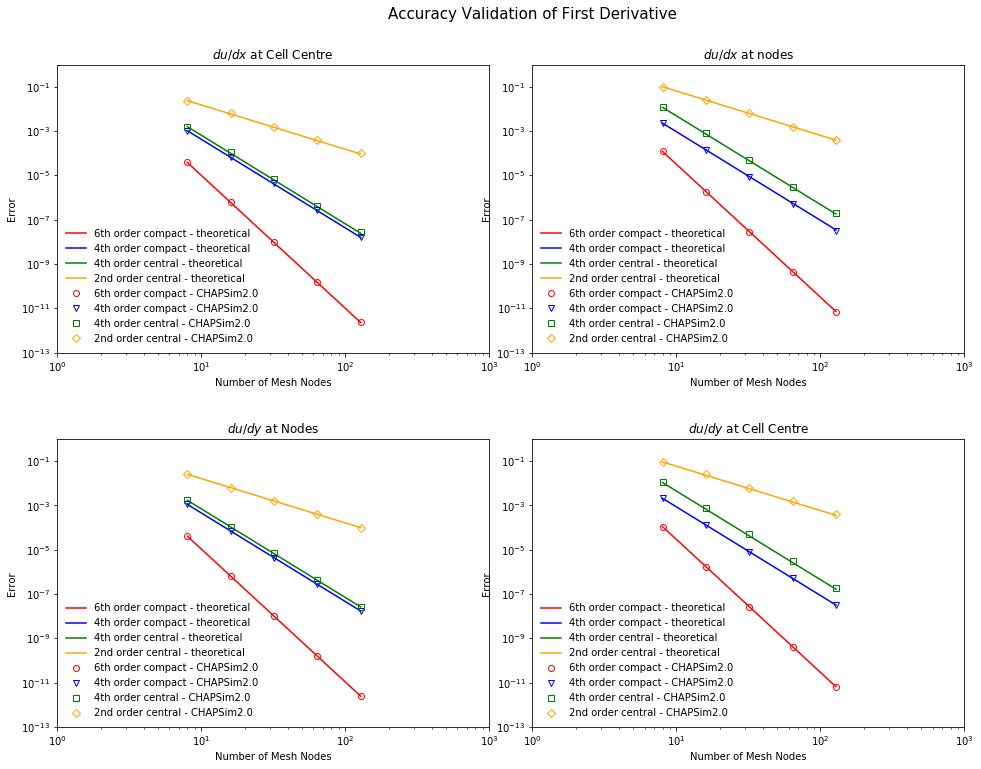

In [107]:
from matplotlib import pyplot as plt
import numpy as np
import pylab as pl
import mpl_toolkits.axisartist as AA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.axes_grid1 import host_subplot
import math
import itertools

%matplotlib inline

plt.rc('figure', facecolor="white")
plt.rc('legend', fontsize=10)
rcParams['legend.loc'] = 'best'
cbrg = cm.get_cmap(name='brg', lut=None) ## 1=green 0=blue  0.5=red


nsz = np.array([8, 16, 32, 64, 128])

# calcuated from CHAPSIM2.0
err6cp_dudx_p2c = np.array([3.8181667E-05, 6.1756630E-07, 9.7274324E-09, 1.5229418E-10, 2.3895330E-12])
err6cp_dudx_p2p = np.array([1.2025461E-04, 1.7782270E-06, 2.7410411E-08, 4.2684534E-10, 6.6758821E-12])
err6cp_dudy_c2p = np.array([4.1327539E-05, 6.2966514E-07, 9.7744993E-09, 1.5248158E-10, 2.3929747E-12])
err6cp_dudy_c2c = np.array([1.1110077E-04, 1.7440589E-06, 2.7278424E-08, 4.2633397E-10, 6.6667782E-12])

err4cp_dudx_p2c = np.array([1.0387320E-03, 6.8872713E-05, 4.3662301E-06, 2.7385276E-07, 1.7130857E-08])
err4cp_dudx_p2p = np.array([2.2746915E-03, 1.3456686E-04, 8.2954552E-06, 5.1668444E-07, 3.2265010E-08])
err4cp_dudy_c2p = np.array([1.1243154E-03, 7.0222009E-05, 4.3873565E-06, 2.7418303E-07, 1.7136020E-08])
err4cp_dudy_c2c = np.array([2.1015409E-03, 1.3198120E-04, 8.2555103E-06, 5.1606207E-07, 3.2255286E-08])

err4cd_dudx_p2c = np.array([1.5885044E-03, 1.0833514E-04, 6.9177997E-06, 4.3467861E-07, 2.7203695E-08])
err4cd_dudx_p2p = np.array([1.1784836E-02, 7.7829418E-04, 4.9317943E-05, 3.0930006E-06, 1.9347897E-07])
err4cd_dudy_c2p = np.array([1.7193847E-03, 1.1045756E-04, 6.9512720E-06, 4.3520283E-07, 2.7211893E-08])
err4cd_dudy_c2c = np.array([1.0887769E-02, 7.6333948E-04, 4.9080463E-05, 3.0892749E-06, 1.9342070E-07])

err2cd_dudx_p2c = np.array([2.3563216E-02, 6.2899220E-03, 1.5978755E-03, 4.0106317E-04, 1.0036555E-04])
err2cd_dudx_p2p = np.array([9.9683684E-02, 2.5504642E-02, 6.4131489E-03, 1.6056070E-03, 4.0154685E-04])
err2cd_dudy_c2p = np.array([2.5504642E-02, 6.4131489E-03, 1.6056070E-03, 4.0154685E-04, 1.0039578E-04])
err2cd_dudy_c2c = np.array([9.2095715E-02, 2.5014577E-02, 6.3822678E-03, 1.6036729E-03, 4.0142591E-04])

# theoretical errors based on the first nsz = 8
err6cp_dudx_p2c_ref = err6cp_dudx_p2c[0] * np.array([1, 2**(-6), 4**(-6), 8**(-6), 16**(-6)])
err4cp_dudx_p2c_ref = err4cp_dudx_p2c[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err4cd_dudx_p2c_ref = err4cd_dudx_p2c[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err2cd_dudx_p2c_ref = err2cd_dudx_p2c[0] * np.array([1, 2**(-2), 4**(-2), 8**(-2), 16**(-2)])

err6cp_dudx_p2p_ref = err6cp_dudx_p2p[0] * np.array([1, 2**(-6), 4**(-6), 8**(-6), 16**(-6)])
err4cp_dudx_p2p_ref = err4cp_dudx_p2p[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err4cd_dudx_p2p_ref = err4cd_dudx_p2p[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err2cd_dudx_p2p_ref = err2cd_dudx_p2p[0] * np.array([1, 2**(-2), 4**(-2), 8**(-2), 16**(-2)])

err6cp_dudy_c2p_ref = err6cp_dudy_c2p[0] * np.array([1, 2**(-6), 4**(-6), 8**(-6), 16**(-6)])
err4cp_dudy_c2p_ref = err4cp_dudy_c2p[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err4cd_dudy_c2p_ref = err4cd_dudy_c2p[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err2cd_dudy_c2p_ref = err2cd_dudy_c2p[0] * np.array([1, 2**(-2), 4**(-2), 8**(-2), 16**(-2)])

err6cp_dudy_c2c_ref = err6cp_dudy_c2c[0] * np.array([1, 2**(-6), 4**(-6), 8**(-6), 16**(-6)])
err4cp_dudy_c2c_ref = err4cp_dudy_c2c[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err4cd_dudy_c2c_ref = err4cd_dudy_c2c[0] * np.array([1, 2**(-4), 4**(-4), 8**(-4), 16**(-4)])
err2cd_dudy_c2c_ref = err2cd_dudy_c2c[0] * np.array([1, 2**(-2), 4**(-2), 8**(-2), 16**(-2)])

lblref = ['6th order compact - theoretical', \
          '4th order compact - theoretical', \
          '4th order central - theoretical', \
          '2nd order central - theoretical']

lblcal = ['6th order compact - CHAPSim2.0', \
          '4th order compact - CHAPSim2.0', \
          '4th order central - CHAPSim2.0', \
          '2nd order central - CHAPSim2.0']

fig, axs=plt.subplots(2, 2)
fig.suptitle('Accuracy Validation of First Derivative', x=1.1, y=1.2, fontsize = 15)
# du/dx, p2c
axs[0, 0]=fig.add_axes([0,0,1,1])
axs[0, 0].set_title("$du/dx$ at Cell Centre", fontsize = 12)
axs[0, 0].set_xscale("log")
axs[0, 0].set_yscale("log")
axs[0, 0].set_xlabel("Number of Mesh Nodes")
axs[0, 0].set_ylabel("Error")
axs[0, 0].set_xlim([1,1000])
axs[0, 0].set_ylim([1e-13,1])

axs[0, 0].plot(nsz, err6cp_dudx_p2c_ref, label=lblref[0], color="red")
axs[0, 0].plot(nsz, err4cp_dudx_p2c_ref, label=lblref[1], color="blue")
axs[0, 0].plot(nsz, err4cd_dudx_p2c_ref, label=lblref[2], color="green")
axs[0, 0].plot(nsz, err2cd_dudx_p2c_ref, label=lblref[3], color="orange")

axs[0, 0].plot(nsz, err6cp_dudx_p2c, label=lblcal[0], ls = "none", marker = "o", mfc="none", mec="red")
axs[0, 0].plot(nsz, err4cp_dudx_p2c, label=lblcal[1], ls = "none", marker = "v", mfc="none", mec="blue")
axs[0, 0].plot(nsz, err4cd_dudx_p2c, label=lblcal[2], ls = "none", marker = "s", mfc="none", mec="green")
axs[0, 0].plot(nsz, err2cd_dudx_p2c, label=lblcal[3], ls = "none", marker = "D", mfc="none", mec="orange")
axs[0, 0].legend(frameon=False)

# du/dx, p2p
axs[0, 1]=fig.add_axes([1.1,0,1,1])
axs[0, 1].set_title("$du/dx$ at nodes", fontsize = 12)
axs[0, 1].set_xscale("log")
axs[0, 1].set_yscale("log")
axs[0, 1].set_xlabel("Number of Mesh Nodes")
axs[0, 1].set_ylabel("Error")
axs[0, 1].set_xlim([1,1000])
axs[0, 1].set_ylim([1e-13,1])

axs[0, 1].plot(nsz, err6cp_dudx_p2p_ref, label=lblref[0], color="red")
axs[0, 1].plot(nsz, err4cp_dudx_p2p_ref, label=lblref[1], color="blue")
axs[0, 1].plot(nsz, err4cd_dudx_p2p_ref, label=lblref[2], color="green")
axs[0, 1].plot(nsz, err2cd_dudx_p2p_ref, label=lblref[3], color="orange")

axs[0, 1].plot(nsz, err6cp_dudx_p2p, label=lblcal[0], ls = "none", marker = "o", mfc="none", mec="red")
axs[0, 1].plot(nsz, err4cp_dudx_p2p, label=lblcal[1], ls = "none", marker = "v", mfc="none", mec="blue")
axs[0, 1].plot(nsz, err4cd_dudx_p2p, label=lblcal[2], ls = "none", marker = "s", mfc="none", mec="green")
axs[0, 1].plot(nsz, err2cd_dudx_p2p, label=lblcal[3], ls = "none", marker = "D", mfc="none", mec="orange")
axs[0, 1].legend(frameon=False)

# du/dy, c2p
axs[1, 0]=fig.add_axes([0,-1.3,1,1])
axs[1, 0].set_title("$du/dy$ at Nodes", fontsize = 12)
axs[1, 0].set_xscale("log")
axs[1, 0].set_yscale("log")
axs[1, 0].set_xlabel("Number of Mesh Nodes")
axs[1, 0].set_ylabel("Error")
axs[1, 0].set_xlim([1,1000])
axs[1, 0].set_ylim([1e-13,1])

axs[1, 0].plot(nsz, err6cp_dudy_c2p_ref, label=lblref[0], color="red")
axs[1, 0].plot(nsz, err4cp_dudy_c2p_ref, label=lblref[1], color="blue")
axs[1, 0].plot(nsz, err4cd_dudy_c2p_ref, label=lblref[2], color="green")
axs[1, 0].plot(nsz, err2cd_dudy_c2p_ref, label=lblref[3], color="orange")

axs[1, 0].plot(nsz, err6cp_dudy_c2p, label=lblcal[0], ls = "none", marker = "o", mfc="none", mec="red")
axs[1, 0].plot(nsz, err4cp_dudy_c2p, label=lblcal[1], ls = "none", marker = "v", mfc="none", mec="blue")
axs[1, 0].plot(nsz, err4cd_dudy_c2p, label=lblcal[2], ls = "none", marker = "s", mfc="none", mec="green")
axs[1, 0].plot(nsz, err2cd_dudy_c2p, label=lblcal[3], ls = "none", marker = "D", mfc="none", mec="orange")
axs[1, 0].legend(frameon=False)

# du/dy, c2c
axs[1, 1]=fig.add_axes([1.1,-1.3,1,1])
axs[1, 1].set_title("$du/dy$ at Cell Centre", fontsize = 12)
axs[1, 1].set_xscale("log")
axs[1, 1].set_yscale("log")
axs[1, 1].set_xlabel("Number of Mesh Nodes")
axs[1, 1].set_ylabel("Error")
axs[1, 1].set_xlim([1,1000])
axs[1, 1].set_ylim([1e-13,1])

axs[1, 1].plot(nsz, err6cp_dudy_c2c_ref, label=lblref[0], color="red")
axs[1, 1].plot(nsz, err4cp_dudy_c2c_ref, label=lblref[1], color="blue")
axs[1, 1].plot(nsz, err4cd_dudy_c2c_ref, label=lblref[2], color="green")
axs[1, 1].plot(nsz, err2cd_dudy_c2c_ref, label=lblref[3], color="orange")

axs[1, 1].plot(nsz, err6cp_dudy_c2c, label=lblcal[0], ls = "none", marker = "o", mfc="none", mec="red")
axs[1, 1].plot(nsz, err4cp_dudy_c2c, label=lblcal[1], ls = "none", marker = "v", mfc="none", mec="blue")
axs[1, 1].plot(nsz, err4cd_dudy_c2c, label=lblcal[2], ls = "none", marker = "s", mfc="none", mec="green")
axs[1, 1].plot(nsz, err2cd_dudy_c2c, label=lblcal[3], ls = "none", marker = "D", mfc="none", mec="orange")
axs[1, 1].legend(frameon=False)


plt.show()